In [1]:
import nltk
import re
from nltk.corpus import stopwords
import pandas

# Get all filenames
corpus = nltk.corpus.PlaintextCorpusReader('../WebScraper/seedly-articles/', '.+\.txt')
fids = corpus.fileids()

# Lines and words to ignore in dataset
stop_lines = ['< BACK TO MAIN BLOG\n', 
              'Whether you love or hate our content... WE WANT TO HEAR WHAT YOU THINK! \n', 
              '#wpdevar_comment_1 span,#wpdevar_comment_1 iframe{width:100% !important;} \n']

extra_stop_words = ['comments']

fids

['bto-housing1.txt',
 'bto-housing10.txt',
 'bto-housing11.txt',
 'bto-housing12.txt',
 'bto-housing13.txt',
 'bto-housing14.txt',
 'bto-housing15.txt',
 'bto-housing16.txt',
 'bto-housing17.txt',
 'bto-housing18.txt',
 'bto-housing19.txt',
 'bto-housing2.txt',
 'bto-housing20.txt',
 'bto-housing21.txt',
 'bto-housing22.txt',
 'bto-housing23.txt',
 'bto-housing24.txt',
 'bto-housing25.txt',
 'bto-housing26.txt',
 'bto-housing27.txt',
 'bto-housing28.txt',
 'bto-housing29.txt',
 'bto-housing3.txt',
 'bto-housing30.txt',
 'bto-housing31.txt',
 'bto-housing32.txt',
 'bto-housing33.txt',
 'bto-housing34.txt',
 'bto-housing35.txt',
 'bto-housing36.txt',
 'bto-housing37.txt',
 'bto-housing38.txt',
 'bto-housing39.txt',
 'bto-housing4.txt',
 'bto-housing40.txt',
 'bto-housing41.txt',
 'bto-housing42.txt',
 'bto-housing43.txt',
 'bto-housing5.txt',
 'bto-housing6.txt',
 'bto-housing7.txt',
 'bto-housing8.txt',
 'bto-housing9.txt',
 'comparison1.txt',
 'comparison10.txt',
 'comparison11.txt',
 

In [3]:
# Prepare corpus and category labels
dataset = {}
corpus = []
stop_words = set(stopwords.words("english"))

for fid in fids:
    z = re.search(r'\d', fid).span()[0]
    category = fid[:z]
    
    # Process each file
    with open('../WebScraper/seedly-articles/' + fid, encoding="utf8") as file:
        current_file = {}
        current_file['content'] = []
        current_file['fid'] = fid
        
        # Process each line and extract title, date and content of article
        for i, line in enumerate(file):
            if i == 5:
                current_file['title'] = line.replace('\n', '').strip()
            elif i == 13:
                current_file['date'] = line.strip()
            elif line in stop_lines or i == 15:
                continue
            else:
                # Tokenize and preprocess
                line = line.replace("’", '')
                line = line.replace("\n", ' ')
                line = line.replace("Guest Contributor", '')
                content = nltk.word_tokenize(line)
                content = [w.lower() for w in content]
                content = [w for w in content if re.search('^[a-z]+$', w)]
                content = [w for w in content if w not in stop_words and w not in extra_stop_words]
                current_file['content'].extend(content)
        current_file['content'] = ' '.join(current_file['content'])
        corpus.append(current_file['content'])
    
    # Append file id, title, date, content to dataset
    if category not in dataset:
        dataset[category] = [current_file]
    else:
        dataset[category].append(current_file)

        
# dataset: 
#   category: [{
#     title: str,
#     date: str,
#     content: str
#   },
#   {
#     title: str,
#     date: str,
#     content: str
#   }]   
        
# dataset

In [4]:
# Prepare corpus for each category
corpus_bto_housing = [file['content'] for file in dataset['bto-housing']]
corpus_comparison = [file['content'] for file in dataset['comparison']]
corpus_financial_lifestyle = [file['content'] for file in dataset['financial-lifestyle']]
corpus_insurance = [file['content'] for file in dataset['insurance']]
corpus_investing = [file['content'] for file in dataset['investing']]
corpus_personal_finance_life_stages = [file['content'] for file in dataset['personal-finance-life-stages']]
corpus_policies_opinion = [file['content'] for file in dataset['policies-opinion']]
corpus_savings = [file['content'] for file in dataset['savings']]
corpus_women_finance = [file['content'] for file in dataset['women-finance']]


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [13]:
# Available corpuses:
#
# corpus_bto_housing
# corpus_comparison
# corpus_financial_lifestyle
# corpus_insurance
# corpus_investing
# corpus_personal_finance_life_stages
# corpus_policies_opinion
# corpus_savings
# corpus_women_finance

# Choose an available corpus from above to be set to this variable
corpus = corpus_insurance

[Text(0, 0, 'insurance'),
 Text(0, 0, 'life'),
 Text(0, 0, 'plan'),
 Text(0, 0, 'coverage'),
 Text(0, 0, 'policy'),
 Text(0, 0, 'years'),
 Text(0, 0, 'get'),
 Text(0, 0, 'premium'),
 Text(0, 0, 'premiums'),
 Text(0, 0, 'one'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'accident'),
 Text(0, 0, 'personal'),
 Text(0, 0, 'singapore'),
 Text(0, 0, 'term'),
 Text(0, 0, 'health'),
 Text(0, 0, 'pay'),
 Text(0, 0, 'year'),
 Text(0, 0, 'hospital'),
 Text(0, 0, 'policies')]

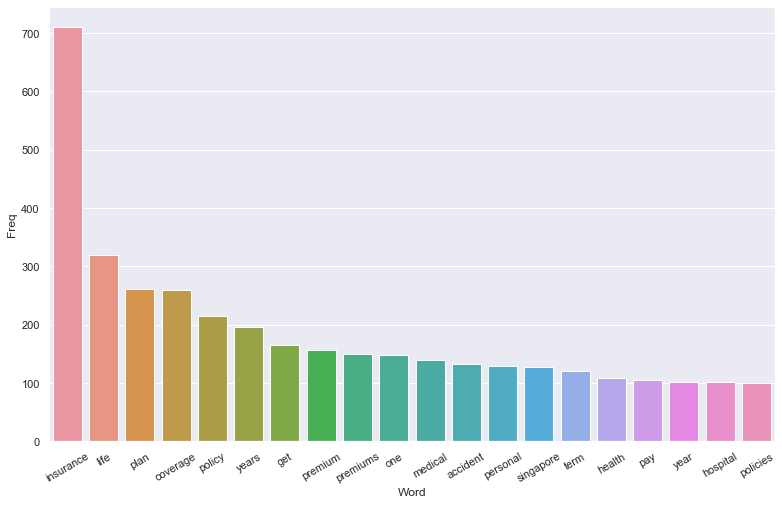

In [14]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

list(cv.vocabulary_.keys())[:10]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

               Bi-gram  Freq
0       life insurance   101
1    personal accident    70
2           whole life    67
3            term life    60
4            years old    60
5    integrated shield    56
6     critical illness    53
7          shield plan    47
8      medishield life    40
9   insurance coverage    38
10       car insurance    37
11         sum assured    35
12      endowment plan    34
13    health insurance    32
14  accident insurance    28
15  insurance policies    27
16   financial advisor    27
17        source giphy    26
18      insurance plan    26
19     careshield life    26


[Text(0, 0, 'life insurance'),
 Text(0, 0, 'personal accident'),
 Text(0, 0, 'whole life'),
 Text(0, 0, 'term life'),
 Text(0, 0, 'years old'),
 Text(0, 0, 'integrated shield'),
 Text(0, 0, 'critical illness'),
 Text(0, 0, 'shield plan'),
 Text(0, 0, 'medishield life'),
 Text(0, 0, 'insurance coverage'),
 Text(0, 0, 'car insurance'),
 Text(0, 0, 'sum assured'),
 Text(0, 0, 'endowment plan'),
 Text(0, 0, 'health insurance'),
 Text(0, 0, 'accident insurance'),
 Text(0, 0, 'insurance policies'),
 Text(0, 0, 'financial advisor'),
 Text(0, 0, 'source giphy'),
 Text(0, 0, 'insurance plan'),
 Text(0, 0, 'careshield life')]

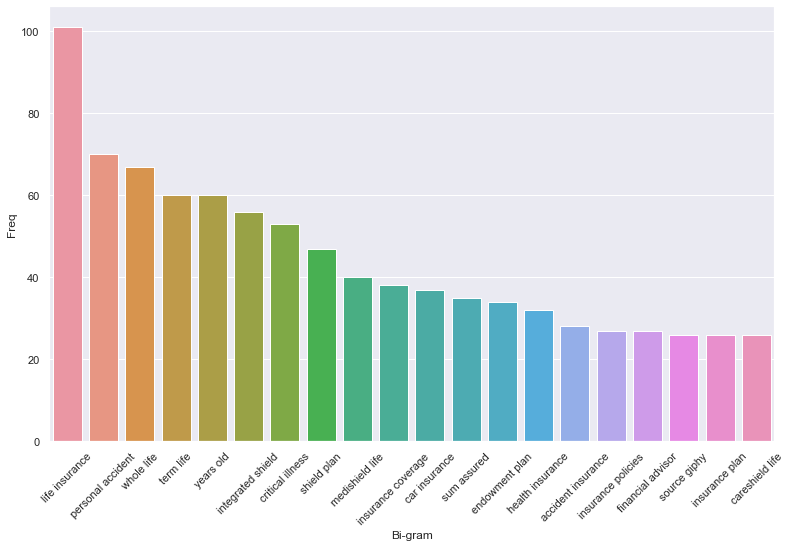

In [15]:

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)


                        Tri-gram  Freq
0         integrated shield plan    44
1            term life insurance    32
2    personal accident insurance    28
3           whole life insurance    28
4          protection scheme dps    20
5   dependants protection scheme    19
6                 cherie tan min    18
7          endowment series four    15
8         personal accident plan    14
9            aia beyond critical    13
10       due malignant condition    12
11                 ming feng min    12
12    personal finance community    12
13       integrated shield plans    12
14          life insurance child    12
15          beyond critical care    12
16        early critical illness    11
17       seedly personal finance    11
18        required due malignant    10
19    total permanent disability    10


[Text(0, 0, 'integrated shield plan'),
 Text(0, 0, 'term life insurance'),
 Text(0, 0, 'personal accident insurance'),
 Text(0, 0, 'whole life insurance'),
 Text(0, 0, 'protection scheme dps'),
 Text(0, 0, 'dependants protection scheme'),
 Text(0, 0, 'cherie tan min'),
 Text(0, 0, 'endowment series four'),
 Text(0, 0, 'personal accident plan'),
 Text(0, 0, 'aia beyond critical'),
 Text(0, 0, 'due malignant condition'),
 Text(0, 0, 'ming feng min'),
 Text(0, 0, 'personal finance community'),
 Text(0, 0, 'integrated shield plans'),
 Text(0, 0, 'life insurance child'),
 Text(0, 0, 'beyond critical care'),
 Text(0, 0, 'early critical illness'),
 Text(0, 0, 'seedly personal finance'),
 Text(0, 0, 'required due malignant'),
 Text(0, 0, 'total permanent disability')]

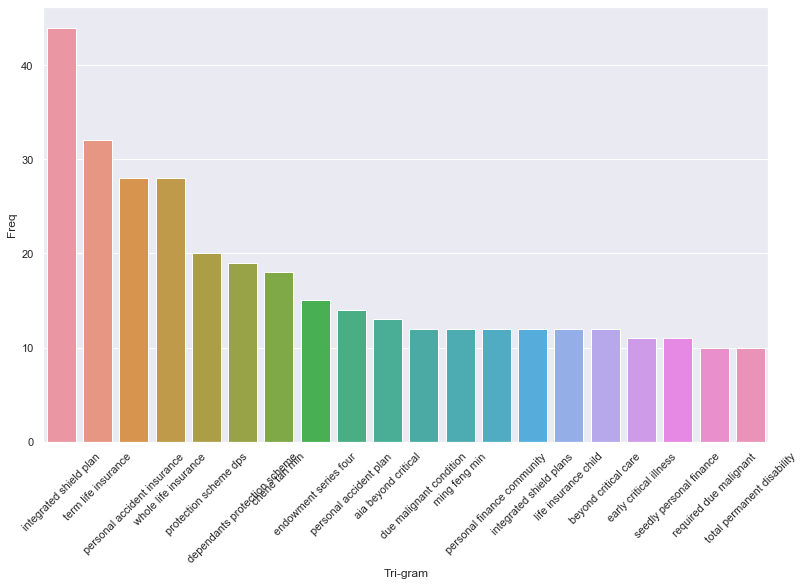

In [16]:

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=' '.join(corpus)
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [18]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
jacqueline yan min readinsurance nomination whats excuse nominate best insurance award ya well morbid topic back sorreh sorreh remember money distributed law may go government pass valid surviving relatives well doesnt case youre well prepared day eventually come source giphy making insurance nomination allows distribute policy proceeds loved ones according wishes wish simple though several things know rushing making nomination tl dr need know insurance nomination policy owner make nominations insurance policies distribute policy proceeds according wishes policies though relevant policies life accident health policies recognised singapore law funded cpf savings pays death benefits two types nominations different conditions tagged trust irrevocable nominationrevocable nomination nominated beneficiaries spouse children onlyanyone happens rights policy owneryou lose rights policy retain rights policy owner written consent beneficiaries required make changes policyno consent req